In [40]:
import kagglehub
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

import os

In [2]:
path = kagglehub.dataset_download("arnavsharma45/mnist-dataset")
print("Path to dataset files:", path)

100%|██████████| 9.14M/9.14M [00:00<00:00, 86.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arnavsharma45/mnist-dataset/versions/1


In [6]:
os.listdir(path)

['mnist_dataset.csv']

In [14]:
df = pd.read_csv(os.path.join(path, "mnist_dataset.csv"))
df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [18]:
# This is MNIST dataset which should contain images of hand written digits, but we don't have labels for each image, so therefore, we can treat this as a unsupervised clustering problem

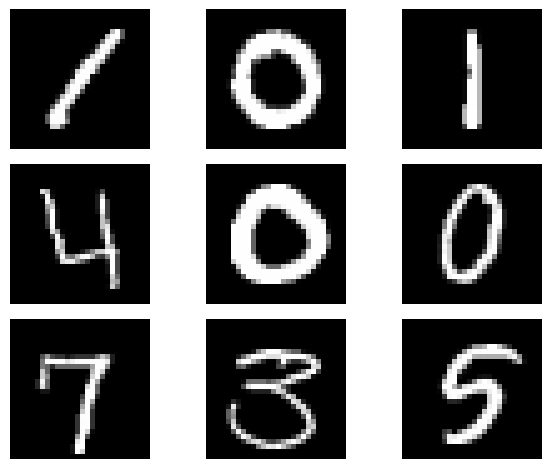

In [20]:
# let's plot some samples

samples = df.iloc[:9, :].values


for i in range(9):
    plt.subplot(3, 3, i + 1)
    # reshape from 784 to (28, 28)
    img = samples[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
# nice, now we will train a Gaussian Mixture model on this, and basically do clustering

scaler = StandardScaler() # scale first
x_scaled = scaler.fit_transform(df)

pca = PCA(n_components=784//4, random_state=42)
x_scaled = pca.fit_transform(x_scaled)

gmm = GaussianMixture(n_components=10, random_state=42)
clusters = gmm.fit_predict(x_scaled)

df['cluster'] = clusters


In [58]:
pca = PCA(n_components=3, random_state=42)
x_plotable = pca.fit_transform(x_scaled)

plot_df = pd.DataFrame(x_plotable, columns=['PC1', 'PC2', 'PC3'])
plot_df['Cluster'] = clusters.astype(str)

fig = px.scatter_3d(
    plot_df, x='PC1', y='PC2', z='PC3',
    color='Cluster',
    title="cool 3 clusters",
    opacity=0.6,
    size_max=2
)

fig.update_traces(marker=dict(size=2))
fig.show()

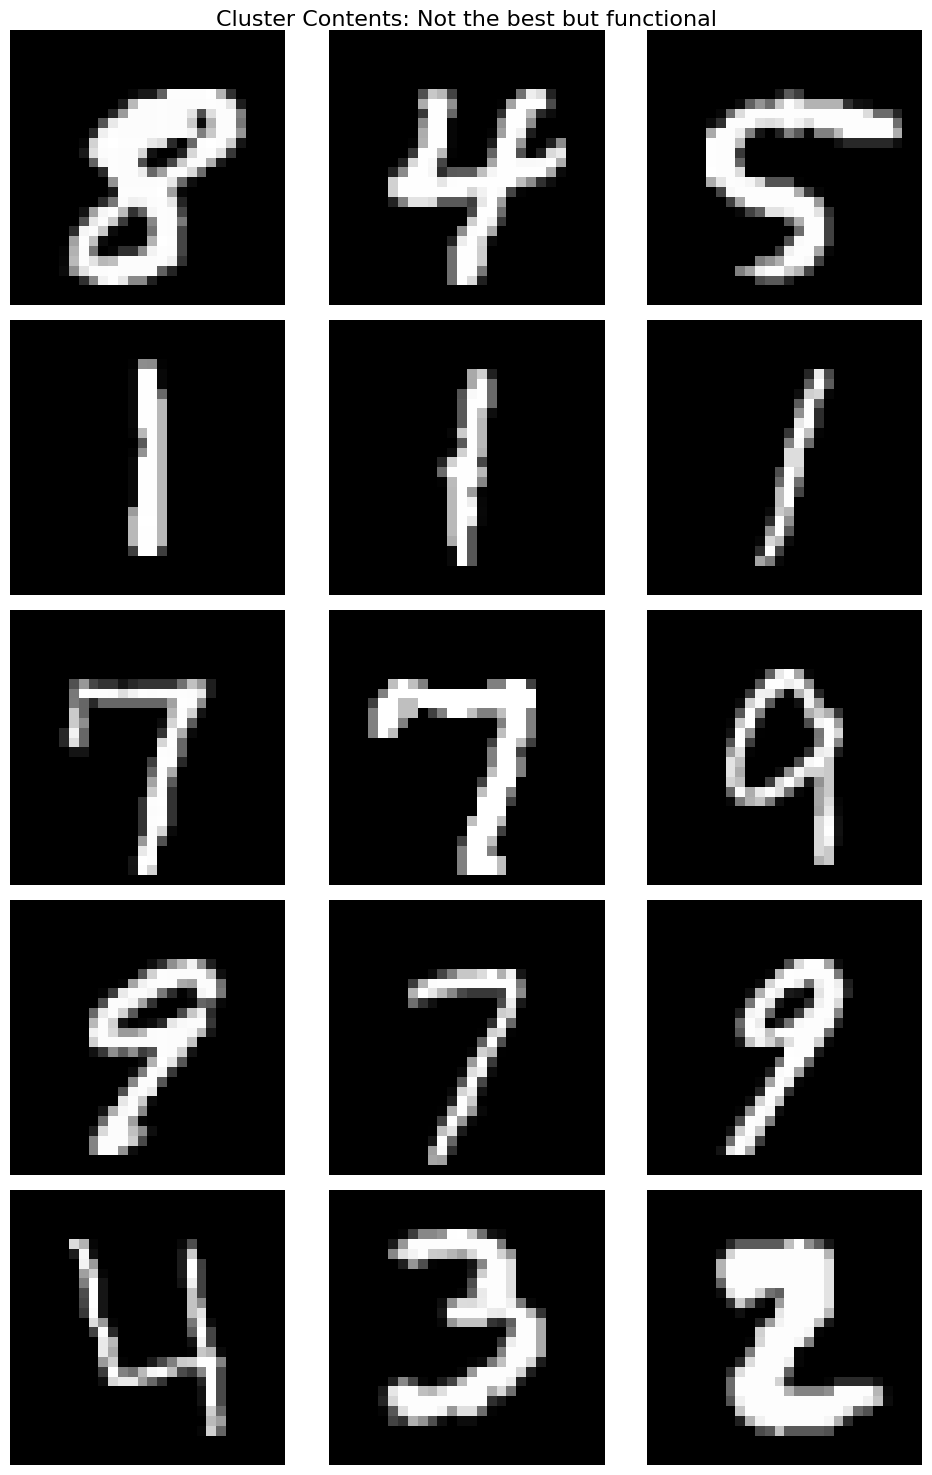

In [54]:
fig, axes = plt.subplots(5, 3, figsize=(10, 15))

for i in range(5):
    cluster_data = df[df['cluster'] == i].drop('cluster', axis=1).head(3).values

    for j in range(3):
        if j < len(cluster_data):
            img = cluster_data[j].reshape(28, 28)
            axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
    axes[i, 0].set_ylabel(f'Cluster {i}', rotation=0, labelpad=40, fontsize=12)

plt.suptitle("Cluster Contents: Not the best but functional", fontsize=16)
plt.tight_layout()
plt.show()